## 1. Problem Statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## A. EXPLORATORY DATA ANALYSIS (EDA)

## 2. Importing require libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3. Importing data

In [2]:
df=pd.read_csv(r'C:\Users\USER\Downloads\stud.csv')
df.head()               

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 4. Checking data information

In [3]:
df.shape

(1000, 8)

Data contain 1000 rows and 8 column 

Checking missing values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

Checking duplicates

In [5]:
df.duplicated().sum()

0

There is no duplicate values

Checking type of column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


From df.info() also we can know about null values, object means categorical and int is numerical 

Checking number of unique values

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check statistics of data set

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Lets separate numerical and categorical column

In [9]:
datatype=df.dtypes
numerical_column=datatype[datatype!='object']
categorical_column=datatype[datatype=='object']

In [10]:
print(numerical_column)

math_score       int64
reading_score    int64
writing_score    int64
dtype: object


In [11]:
print(categorical_column)

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
dtype: object


Lets add 2 more column in original dataset - Total marks and average score

In [12]:
df['Total']=df['math_score']+df['reading_score']+df['writing_score']

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


Similarly, lets add average score

In [14]:
df['Average_Score']=df['Total']/3

In [15]:
df.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Average_Score
955,male,group E,associate's degree,standard,none,72,57,62,191,63.666667


Lets do few calculation using pandas

How many student have full marks in math?

In [16]:
(df['math_score']==100).sum()

7

So, there are 7 students whose marks is full in math

In [17]:
df[df['math_score']==100]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Average_Score
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
623,male,group A,some college,standard,completed,100,96,86,282,94.000000
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000


Similarly, lets see whose score is less than 50 and how many are there in reading 

In [18]:
(df['reading_score']<50).sum()

90

In [19]:
df[df['reading_score']<50]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Average_Score
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
18,male,group C,master's degree,free/reduced,completed,46,42,46,134,44.666667
33,male,group D,some college,standard,none,40,42,38,120,40.000000
52,male,group C,some college,standard,none,53,44,42,139,46.333333
...,...,...,...,...,...,...,...,...,...,...
910,male,group D,bachelor's degree,free/reduced,none,50,42,48,140,46.666667
928,male,group E,associate's degree,free/reduced,completed,46,43,44,133,44.333333
978,male,group D,high school,standard,completed,55,41,48,144,48.000000
980,female,group B,high school,free/reduced,none,8,24,23,55,18.333333


## 5. Data visualization

<Axes: xlabel='math_score', ylabel='Density'>

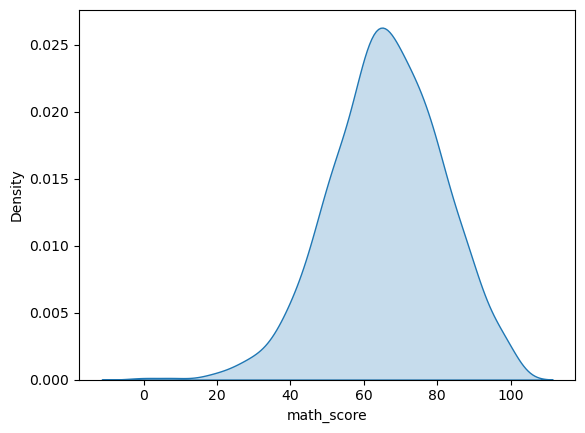

In [20]:
sns.kdeplot(data=df['math_score'], shade=True)

<Axes: xlabel='reading_score', ylabel='Density'>

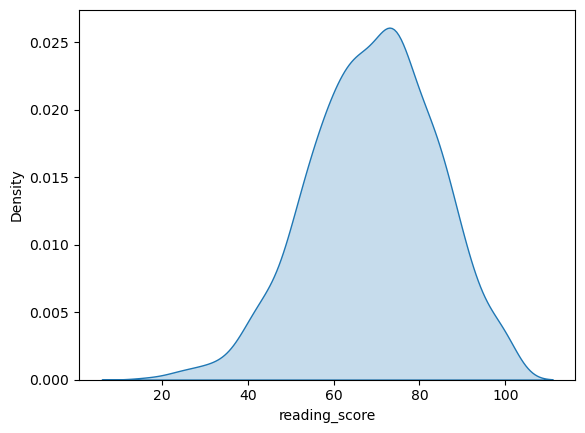

In [21]:
sns.kdeplot(data=df['reading_score'], shade=True)

<Axes: xlabel='writing_score', ylabel='Density'>

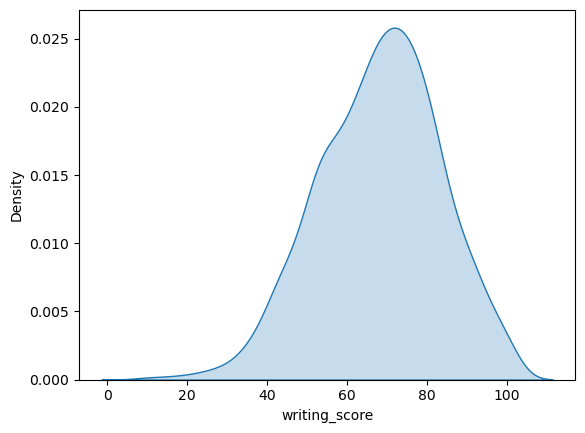

In [22]:
sns.kdeplot(data=df['writing_score'], shade=True)

<Axes: ylabel='Density'>

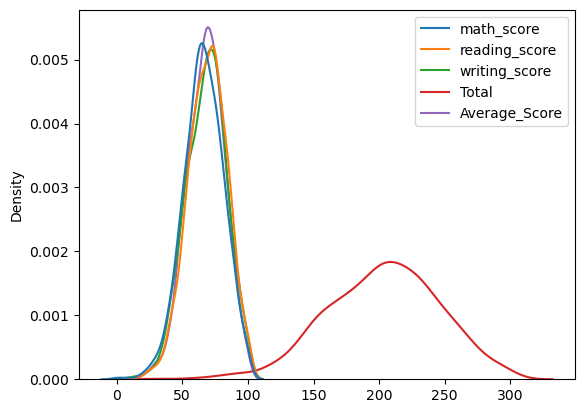

In [23]:
sns.kdeplot(data=df)

From above kde graph we can say that math score & writing score is more sekewed towards left and reading is also left sekewed but it does not have long tail. So, may be writing and math have more outlier towards left , lets check:

Boxplot

<Axes: >

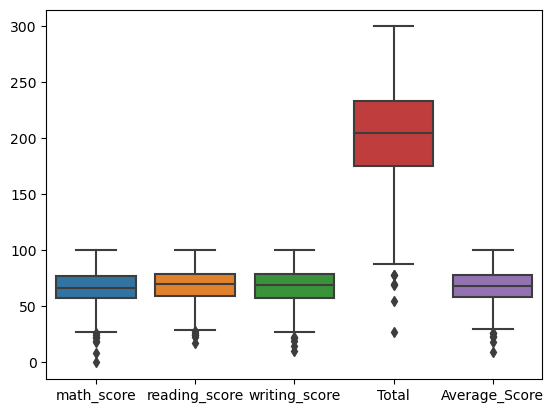

In [24]:
sns.boxplot(data=df)

<Axes: >

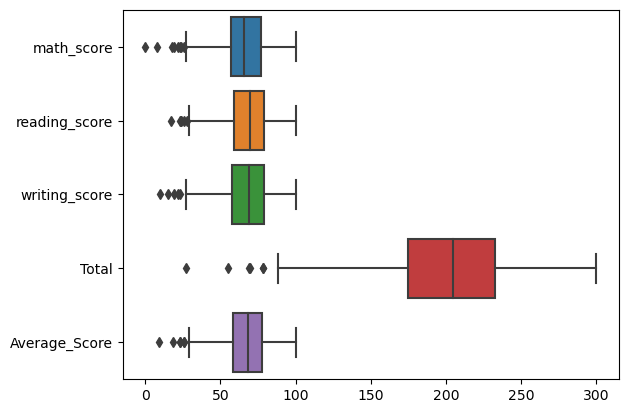

In [25]:
# lets see horizantally
sns.boxplot(data=df, orient='h')

Yes we are right all outlier on left side

For categorical column, Visulaization

<Axes: xlabel='gender', ylabel='count'>

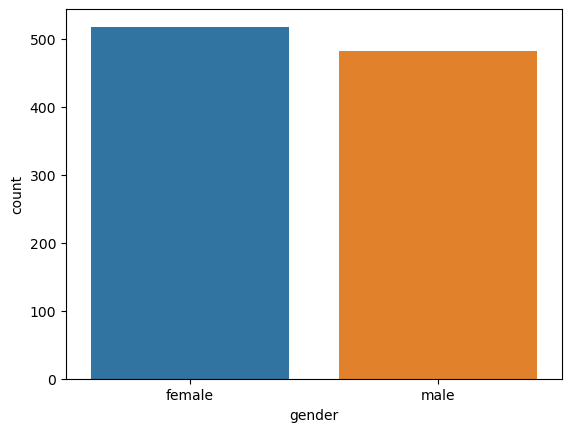

In [26]:
sns.countplot(x='gender', data=df)

Relation between two Numerical variable - Scatter plot

<Axes: xlabel='reading_score', ylabel='writing_score'>

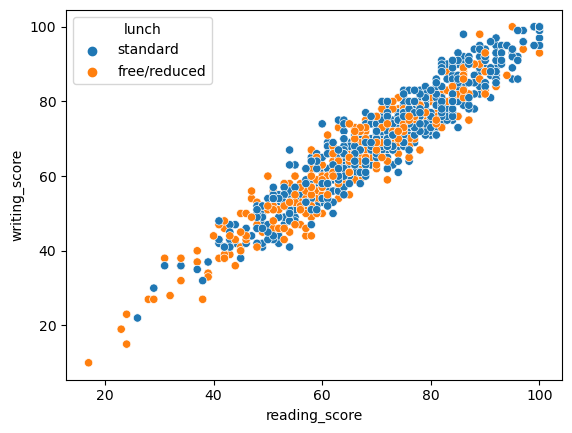

In [27]:
sns.scatterplot(data=df,x='reading_score',y='writing_score',hue='lunch')

Is there any impact of launch on student performance?

<Axes: xlabel='lunch', ylabel='Total'>

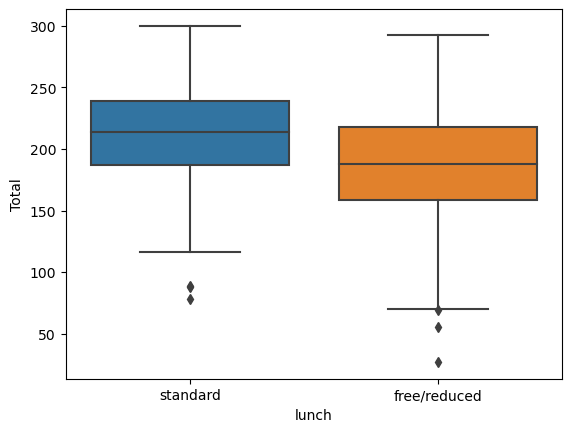

In [28]:
sns.boxplot(x='lunch', y='Total', data=df)

<Axes: xlabel='lunch', ylabel='Total'>

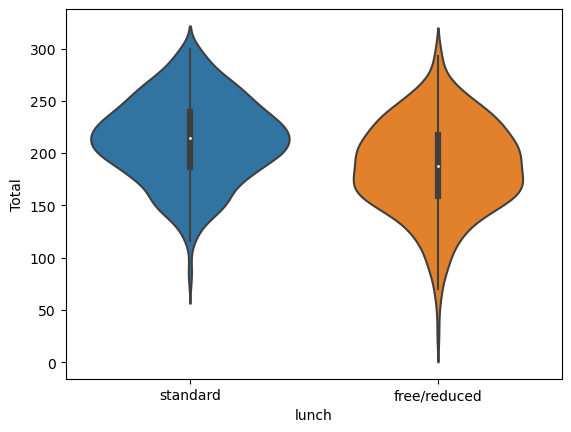

In [29]:
sns.violinplot(x='lunch', y='Total', data=df)

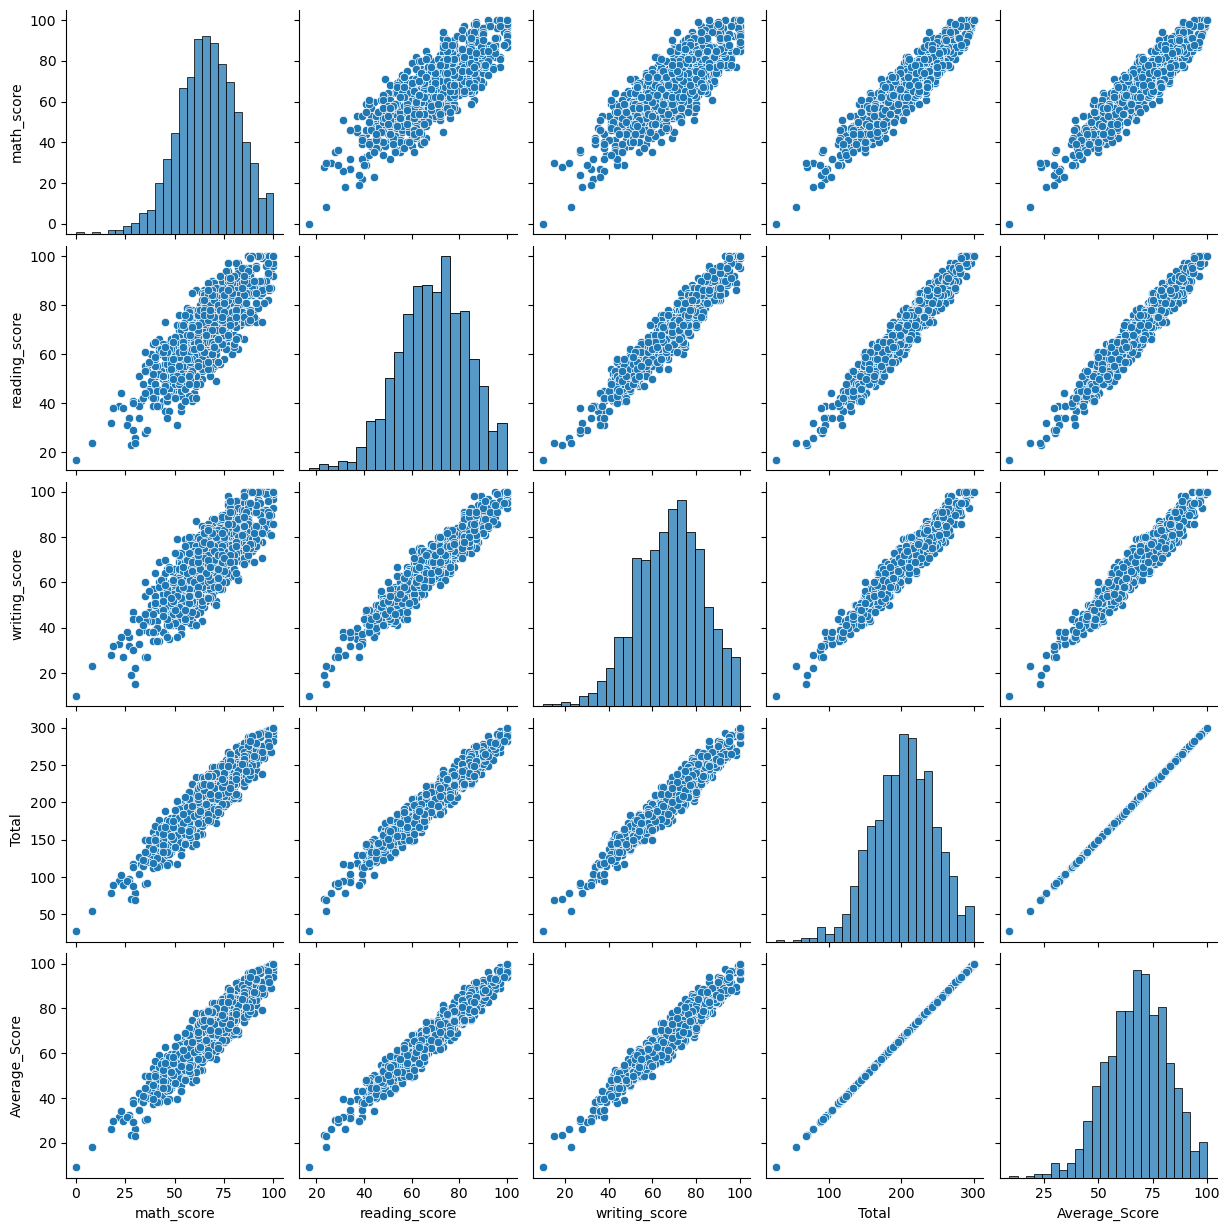

In [30]:
sns.pairplot(df)

## B. Machine Learning and Feature Engineering 

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [32]:
# lets check data once
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Here we do not need Average_Score and Total, because there are just a column we added for EDA, now lets use all other column as X variable and math score as Y variable or target. 

In [33]:
df=df.drop(columns=['Total','Average_Score'],axis=1)

In [34]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Now lets divide into X and Y

In [35]:
X = df.drop(columns=['math_score'],axis=1)
Y= df['math_score']

Now, in X we have both column categorical as well as numerical, so it is better now we need to convert categorical column in numerical using one hot encoder & numerical column to standardization. 

In [36]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [37]:
X = preprocessor.fit_transform(X)

In [38]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
# Create an instance of the LinearRegression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 29.095169866715516
R-squared Score: 0.8804332983749564


In [40]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {dt_mse}, R2: {dt_r2}")

Decision Tree MSE: 63.935, R2: 0.7372588954312185


In [41]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {rf_mse}, R2: {rf_r2}")

Random Forest MSE: 36.81509916425737, R2: 0.8487082221126736
